## Pérdire les périodes temporelles en utilisant LOO

###### Pour ce notebook, on utilise les nouvelles données traités par Eric et Ameline et qui concernet 315 sujets.
1/ Pour prédire la période temporelle (5 ou 17 labels) : on conserve les individus avec des données complètes, soit 315 sujets. On retire ensuite les données de type d’inhumation et d’arrangement car cela brouille les informations lorsque tu fais les k-means. J’ai repris la modification des classes d’âge dont on avait parlé quand on est venu à Nancy (soit 0-1, 1-5, 5-12, sup 12).
Je t’ai créé le fichier. Fichier : Egypte_period_prediction.csv



## Prédire La période temporelle en utilsant 17 labels 

### Pre-process the data 

In [3]:
# import des bibliothèques Python utiles:
import numpy as np
import matplotlib.pyplot as plt
import random
# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import pandas as pd
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =10,5

In [4]:
dataEgypt_17 = pd.read_csv("Egypte_period_prediction.csv", sep=';',decimal=',')

In [5]:
dataEgypt_17.head()

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Nb_Ornement,orn_Porte,orn_Nonporte,Coquillage,Aspatharia_unio,Perles,Fard,Outils,Prosterne,Decoupe
0,161,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,5,1,...,1,0,0,0,1,1,1,0,0,0
1,164,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,3,1,...,0,0,0,0,0,0,0,0,0,0
2,447,IIID/3e dyn,IIID/3e dyn,sup 12,G,SE,Sol,tete,3,0,...,0,0,0,0,0,0,0,0,0,0
3,452,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,1,0,...,0,0,0,0,0,0,0,0,0,0
4,454,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,1,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
dataEgypt_17.period_17_labels.value_counts()

IIIA1-A2       62
IIIA2          61
IIID/3e dyn    60
IIIA1          49
3e dyn         22
IID-IIIA1      15
IID            14
IID-IIIA2      12
IIIA2-IIIC      4
IIIA2-IIID      3
IIID            3
IIC-IID         2
IIIC/IIID       2
IIC-IIIA1       2
IIIC            2
IIC             1
IIIB            1
Name: period_17_labels, dtype: int64

<AxesSubplot: >

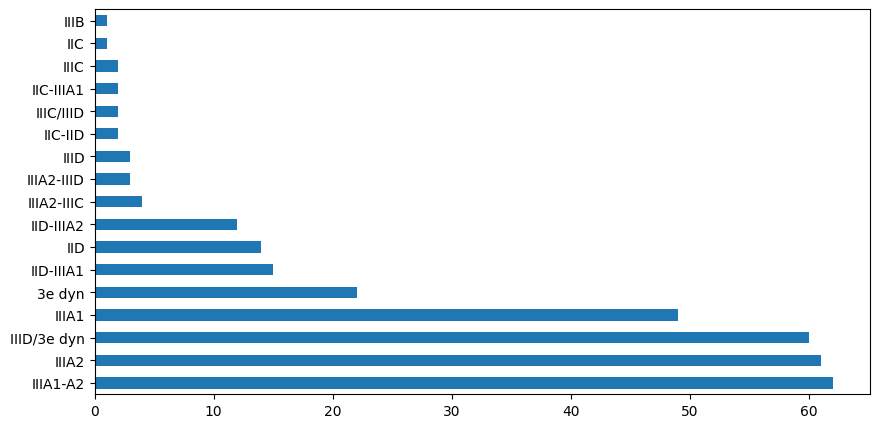

In [7]:
dataEgypt_17['period_17_labels'].value_counts().plot(kind='barh')

In [8]:
dataEgypt_17.columns.values.tolist()

['Sepult',
 'Periode_5_label',
 'period_17_labels',
 'classe_age',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe']

### Data encoding 

In [9]:
Cols_=['classe_age','Position_corps','Orientation_tete','Orientation_Face','Position_mains']

In [10]:
from sklearn.preprocessing import OneHotEncoder

def encoding_data(dataframe, cols):
    

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')


    #perform one-hot encoding on 'the following' columns 

    encoder_df = pd.DataFrame(encoder.fit_transform(dataframe[cols]).toarray())

    encoder_df.columns = encoder.get_feature_names(cols)


    #merge one-hot encoded columns back with original DataFrame
    data_encoded = dataframe.join(encoder_df)
    
    return data_encoded

In [11]:
data_encoded_Egypt_17=encoding_data(dataEgypt_17, Cols_)

/Users/chahrazedlabba/miniforge3/envs/IEEEtlt/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
data_encoded_Egypt_17

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,161,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,5,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,164,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,447,IIID/3e dyn,IIID/3e dyn,sup 12,G,SE,Sol,tete,3,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,452,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,454,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,886,3e dyn,3e dyn,5/12,D,N,E,thorax,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,924,IIID/3e dyn,IIID/3e dyn,5/12,D,O,S,asymetrique_thorax_tete,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,943,IIID/3e dyn,IIID/3e dyn,5/12,G,NO,SE,tete,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313,987,3e dyn,3e dyn,5/12,D,N,Sol,asymetrique_jambe_tete,2,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
data_encoded_Egypt_17.columns.values.tolist()

['Sepult',
 'Periode_5_label',
 'period_17_labels',
 'classe_age',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0-1',
 'classe_age_1-5',
 'classe_age_5/12',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Or

In [14]:
cols_to_norm=['Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0-1',
 'classe_age_1-5',
 'classe_age_5/12',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [15]:
#normalize the data before start working with it
#for that we will use the StandardScaler normalizer de from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data_encoded_Egypt_17[cols_to_norm] = MinMaxScaler().fit_transform(data_encoded_Egypt_17[cols_to_norm])

In [16]:
data_encoded_Egypt_17.head()

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,161,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,0.4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,164,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,447,IIID/3e dyn,IIID/3e dyn,sup 12,G,SE,Sol,tete,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,452,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,O,tete,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,454,IIID/3e dyn,IIID/3e dyn,sup 12,G,S,SO,tete,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
data_encoded_Egypt_17['period_17_labels'].replace({'IIID/3e dyn':0, 'IIIA1-A2':1,'IIIA2':2,
                                                      'IIIA1':3,'3e dyn':4,'IID-IIIA1':5,'IID':6, 'IID-IIIA2':7,
                                                     'IIIA2-IIIC':8,'IIID':9,'IIIA2-IIID':10,
                                                     'IIIC':11,'IIIC/IIID':12,'IIC-IID':13,
                                                     'IIC-IIIA1':14,'IIC':15,'IIIB':16}, inplace=True)

In [28]:
data_encoded_Egypt_17

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,161,IIID/3e dyn,0,sup 12,G,S,SO,tete,0.4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,164,IIID/3e dyn,0,sup 12,G,S,O,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,447,IIID/3e dyn,0,sup 12,G,SE,Sol,tete,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,452,IIID/3e dyn,0,sup 12,G,S,O,tete,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,454,IIID/3e dyn,0,sup 12,G,S,SO,tete,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,886,3e dyn,4,5/12,D,N,E,thorax,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,924,IIID/3e dyn,0,5/12,D,O,S,asymetrique_thorax_tete,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,943,IIID/3e dyn,0,5/12,G,NO,SE,tete,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313,987,3e dyn,4,5/12,D,N,Sol,asymetrique_jambe_tete,0.1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
data_encoded_Egypt_17['period_17_labels'].value_counts()

1     62
2     61
0     60
3     49
4     22
5     15
6     14
7     12
8      4
10     3
9      3
13     2
12     2
14     2
11     2
15     1
16     1
Name: period_17_labels, dtype: int64

### Cross Validation Using Leave one Out method

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score

In [31]:
data_encoded_Egypt_17.columns.values.tolist()

['Sepult',
 'Periode_5_label',
 'period_17_labels',
 'classe_age',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0-1',
 'classe_age_1-5',
 'classe_age_5/12',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Or

In [33]:
cols_features= ['period_17_labels',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0-1',
 'classe_age_1-5',
 'classe_age_5/12',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [35]:
data_=data_encoded_Egypt_17[cols_features]
# Separate the target variable and the features
X = data_.drop('period_17_labels', axis=1)
y = data_['period_17_labels']

### Random Forest Train and Test : Leave One Out

In [54]:
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_RF=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    clf=RandomForestClassifier(n_estimators= 400,max_depth=10,min_samples_split=2,min_samples_leaf=1, random_state=42)
    clf.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(clf.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=clf.predict(X_test).tolist()
    Df_predictions_RF=pd.concat([Df_predictions_RF,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [0]
Fold 2 - Prediction: [0], Actual: [0]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [0]
Fold 5 - Prediction: [0], Actual: [0]
Fold 6 - Prediction: [0], Actual: [0]
Fold 7 - Prediction: [0], Actual: [0]
Fold 8 - Prediction: [0], Actual: [0]
Fold 9 - Prediction: [0], Actual: [0]
Fold 10 - Prediction: [0], Actual: [0]
Fold 11 - Prediction: [0], Actual: [7]
Fold 12 - Prediction: [0], Actual: [2]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [4]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [9]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [0], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [55]:
accuracy = accuracy_score(Df_predictions_RF['period_17_labels'], Df_predictions_RF['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_RF.loc[Df_predictions_RF['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    if (len(df)>0):  
        acc=(len(df_p)/len(df))*100
    else : 
        acc=0
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 35.87301587301587
for the class label  {0}
Acuracy is  {71.66666666666667}
for the class label  {1}
Acuracy is  {46.774193548387096}
for the class label  {2}
Acuracy is  {37.704918032786885}
for the class label  {3}
Acuracy is  {24.489795918367346}
for the class label  {4}
Acuracy is  {18.181818181818183}
for the class label  {5}
Acuracy is  {0.0}
for the class label  {6}
Acuracy is  {14.285714285714285}
for the class label  {7}
Acuracy is  {0.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [48]:
Df_predictions_RF.to_csv('df_results_RF_17_labels_LOO.csv')

### SVM Train and Test : Leave One Out

In [49]:
from sklearn.svm import SVC
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_SVM=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    SVM = SVC(C=100, gamma=0.01,probability=True)
    SVM.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(SVM.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=SVM.predict(X_test).tolist()
    Df_predictions_SVM=pd.concat([Df_predictions_SVM,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [0]
Fold 2 - Prediction: [0], Actual: [0]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [0]
Fold 5 - Prediction: [0], Actual: [0]
Fold 6 - Prediction: [0], Actual: [0]
Fold 7 - Prediction: [0], Actual: [0]
Fold 8 - Prediction: [0], Actual: [0]
Fold 9 - Prediction: [4], Actual: [0]
Fold 10 - Prediction: [1], Actual: [0]
Fold 11 - Prediction: [0], Actual: [7]
Fold 12 - Prediction: [0], Actual: [2]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [4]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [9]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [0], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [50]:
accuracy = accuracy_score(Df_predictions_SVM['period_17_labels'], Df_predictions_SVM['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_SVM.loc[Df_predictions_SVM['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 33.01587301587301
for the class label  {0}
Acuracy is  {58.333333333333336}
for the class label  {1}
Acuracy is  {45.16129032258064}
for the class label  {2}
Acuracy is  {29.508196721311474}
for the class label  {3}
Acuracy is  {20.408163265306122}
for the class label  {4}
Acuracy is  {27.27272727272727}
for the class label  {5}
Acuracy is  {6.666666666666667}
for the class label  {6}
Acuracy is  {21.428571428571427}
for the class label  {7}
Acuracy is  {25.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [56]:
Df_predictions_SVM.to_csv('df_results_SVM_17_labels_LOO.csv')

## XGboost Train and Test : Leave One Out

In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
le = LabelEncoder()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_xgboost=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = le.fit_transform(y_train)
    #Create the Model 
    xgb_cl = XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.01)
    xgb_cl.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(xgb_cl.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=xgb_cl.predict(X_test).tolist()
    Df_predictions_xgboost=pd.concat([Df_predictions_xgboost,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [0]
Fold 2 - Prediction: [0], Actual: [0]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [0]
Fold 5 - Prediction: [0], Actual: [0]
Fold 6 - Prediction: [0], Actual: [0]
Fold 7 - Prediction: [0], Actual: [0]
Fold 8 - Prediction: [0], Actual: [0]
Fold 9 - Prediction: [0], Actual: [0]
Fold 10 - Prediction: [0], Actual: [0]
Fold 11 - Prediction: [0], Actual: [7]
Fold 12 - Prediction: [0], Actual: [2]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [4]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [9]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [0], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [58]:
accuracy = accuracy_score(Df_predictions_xgboost['period_17_labels'], Df_predictions_xgboost['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_xgboost.loc[Df_predictions_xgboost['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 35.87301587301587
for the class label  {0}
Acuracy is  {66.66666666666666}
for the class label  {1}
Acuracy is  {43.54838709677419}
for the class label  {2}
Acuracy is  {36.0655737704918}
for the class label  {3}
Acuracy is  {32.6530612244898}
for the class label  {4}
Acuracy is  {22.727272727272727}
for the class label  {5}
Acuracy is  {0.0}
for the class label  {6}
Acuracy is  {21.428571428571427}
for the class label  {7}
Acuracy is  {0.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [59]:
Df_predictions_xgboost.to_csv('df_results_xGboost_17_labels_LOO.csv')

## Train and Test on 5 class labels

In [60]:
data_encoded_Egypt_17

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,161,IIID/3e dyn,0,sup 12,G,S,SO,tete,0.4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,164,IIID/3e dyn,0,sup 12,G,S,O,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,447,IIID/3e dyn,0,sup 12,G,SE,Sol,tete,0.2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,452,IIID/3e dyn,0,sup 12,G,S,O,tete,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,454,IIID/3e dyn,0,sup 12,G,S,SO,tete,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,886,3e dyn,4,5/12,D,N,E,thorax,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
311,924,IIID/3e dyn,0,5/12,D,O,S,asymetrique_thorax_tete,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312,943,IIID/3e dyn,0,5/12,G,NO,SE,tete,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
313,987,3e dyn,4,5/12,D,N,Sol,asymetrique_jambe_tete,0.1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
data_encoded_Egypt_17.Periode_5_label.value_counts()

South sector    227
IIID/3e dyn      60
3e dyn           22
IIID              3
1e dyn            2
IIIA1-A2          1
Name: Periode_5_label, dtype: int64

In [66]:
data_encoded_Egypt_17['Periode_5_label'].replace({'South sector':0, 'IIID/3e dyn':1,'3e dyn':2,
                                                      'IIID':3,'1e dyn':4,'IIIA1-A2':5 }, inplace=True)

In [67]:
data_encoded_Egypt_17.Periode_5_label.value_counts()

0    227
1     60
2     22
3      3
4      2
5      1
Name: Periode_5_label, dtype: int64

In [70]:
cols_features= ['Periode_5_label',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0-1',
 'classe_age_1-5',
 'classe_age_5/12',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [69]:
data_=data_encoded_Egypt_17[cols_features]
# Separate the target variable and the features
X = data_.drop('Periode_5_label', axis=1)
y = data_['Periode_5_label']

### Random Forest : LOO

In [80]:
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_RF=pd.DataFrame()

    
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    #Create the Model 
    clf=RandomForestClassifier(n_estimators= 400,max_depth=5,min_samples_split=2,min_samples_leaf=1, random_state=42)
    clf.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(clf.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=clf.predict(X_test).tolist()
    Df_predictions_RF=pd.concat([Df_predictions_RF,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [0], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [0], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [1], Actual: [1]
Fold 10 - Prediction: [0], Actual: [1]
Fold 11 - Prediction: [0], Actual: [0]
Fold 12 - Prediction: [1], Actual: [0]
Fold 13 - Prediction: [1], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [1], Actual: [1]
Fold 16 - Prediction: [0], Actual: [1]
Fold 17 - Prediction: [1], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [2]
Fold 20 - Prediction: [1], Actual: [1]
Fold 21 - Prediction: [1], Actual: [3]
Fold 22 - Prediction: [1], Actual: [1]
Fold 23 - Prediction: [1], Actual: [1]
Fold 24 - Prediction: [1], Actual: [1]
Fold 25 - Prediction: [1], Actual: [1]
Fold 26 - Prediction: [1], Actual:

In [81]:
accuracy = accuracy_score(y_true,y_pred)
print("total accuracy",accuracy*100)

for i in range (6): 
    df=Df_predictions_RF.loc[Df_predictions_RF['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 78.41269841269842
for the class label  {0}
Acuracy is  {99.55947136563876}
for the class label  {1}
Acuracy is  {35.0}
for the class label  {2}
Acuracy is  {0.0}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}
for the class label  {5}
Acuracy is  {0.0}


In [82]:
Df_predictions_RF.to_csv('df_results_RF_5_labels_LOO.csv')

## SVM train and test LOO¶

In [83]:
from sklearn.svm import SVC
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_SVM=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    SVM = SVC(C=100, gamma=0.01,probability=True)
    SVM.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(SVM.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=SVM.predict(X_test).tolist()
    Df_predictions_SVM=pd.concat([Df_predictions_SVM,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [1], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [1], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [2], Actual: [1]
Fold 10 - Prediction: [0], Actual: [1]
Fold 11 - Prediction: [0], Actual: [0]
Fold 12 - Prediction: [1], Actual: [0]
Fold 13 - Prediction: [1], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [1], Actual: [1]
Fold 16 - Prediction: [1], Actual: [1]
Fold 17 - Prediction: [1], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [2]
Fold 20 - Prediction: [1], Actual: [1]
Fold 21 - Prediction: [1], Actual: [3]
Fold 22 - Prediction: [1], Actual: [1]
Fold 23 - Prediction: [1], Actual: [1]
Fold 24 - Prediction: [1], Actual: [1]
Fold 25 - Prediction: [1], Actual: [1]
Fold 26 - Prediction: [1], Actual:

In [85]:
accuracy = accuracy_score(y_true, y_pred)
print("total accuracy",accuracy*100)

for i in range (6): 
    df=Df_predictions_SVM.loc[Df_predictions_SVM['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 77.46031746031747
for the class label  {0}
Acuracy is  {92.95154185022027}
for the class label  {1}
Acuracy is  {45.0}
for the class label  {2}
Acuracy is  {27.27272727272727}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}
for the class label  {5}
Acuracy is  {0.0}


In [86]:
Df_predictions_SVM.to_csv('df_results_SVM_5_labels_LOO.csv')

## XGboost Train and Test LOO

In [87]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
le = LabelEncoder()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_xgboost=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = le.fit_transform(y_train)
    #Create the Model 
    xgb_cl = XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.01)
    xgb_cl.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(xgb_cl.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=xgb_cl.predict(X_test).tolist()
    Df_predictions_xgboost=pd.concat([Df_predictions_xgboost,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [1], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [1], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [1], Actual: [1]
Fold 10 - Prediction: [1], Actual: [1]
Fold 11 - Prediction: [1], Actual: [0]
Fold 12 - Prediction: [1], Actual: [0]
Fold 13 - Prediction: [1], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [1], Actual: [1]
Fold 16 - Prediction: [0], Actual: [1]
Fold 17 - Prediction: [1], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [2]
Fold 20 - Prediction: [1], Actual: [1]
Fold 21 - Prediction: [1], Actual: [3]
Fold 22 - Prediction: [1], Actual: [1]
Fold 23 - Prediction: [1], Actual: [1]
Fold 24 - Prediction: [1], Actual: [1]
Fold 25 - Prediction: [1], Actual: [1]
Fold 26 - Prediction: [1], Actual:

In [89]:
accuracy = accuracy_score(y_true, y_pred )
print("total accuracy",accuracy*100)

for i in range (5): 
    df=Df_predictions_xgboost.loc[Df_predictions_xgboost['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 78.41269841269842
for the class label  {0}
Acuracy is  {94.27312775330397}
for the class label  {1}
Acuracy is  {46.666666666666664}
for the class label  {2}
Acuracy is  {22.727272727272727}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}


In [90]:
Df_predictions_xgboost.to_csv('df_results_xgboost_5_labels_LOO.csv')

###  clustering + prediction du sex 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import pandas as pd
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =20,10
from sklearn.metrics import silhouette_score

In [71]:
def Best_Clustering(data, max_clusters = 15, scaling = True, visualization = True):
    
    n_clusters_list=[]
    silhouette_list=[]
   
    
    if scaling:
    #Data Scaling
        scaler = MinMaxScaler()
        data_std = scaler.fit_transform(data)
    else:    
        data_std = data[cols_to_use]
        
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data_std) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data_std, labels, metric='euclidean'))
    
    # Best Parameters
    param1 = n_clusters_list[np.argmax(silhouette_list)]
    param2 = max(silhouette_list)
    best_params = param1,param2
    
    # Data labeling with the best model
    kmeans_best = KMeans(n_clusters= param1 , random_state=42).fit(data_std) 
    labels_best = kmeans_best.labels_
    labeled_data = np.concatenate((data,labels_best.reshape(-1,1)),axis=1)
        
    if visualization:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.plot(n_clusters_list,silhouette_list, linewidth=3,
                label = "Silhouette Score Against # of Clusters")
        ax.set_xlabel("Number of clusters")
        ax.set_ylabel("Silhouette score")
        ax.set_title('Silhouette score according to number of clusters')
        ax.grid(True)
        plt.plot(param1,param2, "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
        plt.legend(loc="best",fontsize = 'large')
        plt.show();
        print( " Best Clustering corresponds to the following point : \
        Number of clusters = %i & Silhouette_score = %.2f."%best_params) 
    else:
        return best_params, labeled_data

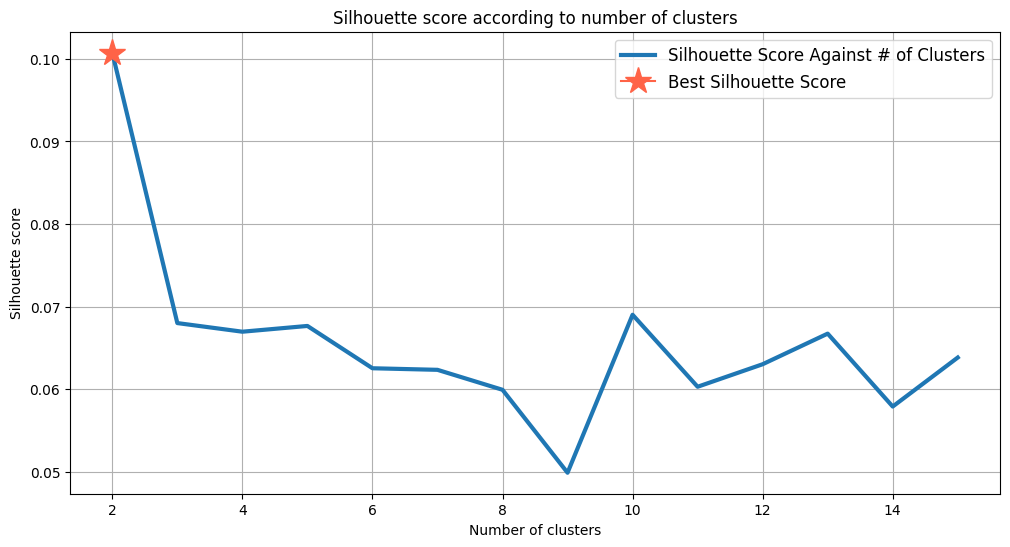

 Best Clustering corresponds to the following point :         Number of clusters = 2 & Silhouette_score = 0.10.


In [72]:
cols_=['Sepult','Periode_5_label','period_17_labels','Nb_actes','Mobilier','Nb_Mobilier','mob_tete',
 'mob_membre_inf','mob_thorax','mob_dos','mob_devant_corps','mob_contre_jarre','mob_dans_jarre',
 'mob_exterieur_coffre','mob_dans_coffre','mob_contre_paroi','mob_dans_remplissage','Signalisation',
 'pelle ','Ornement ','Nb_Ornement','orn_Porte','orn_Nonporte','Coquillage','Aspatharia_unio',
 'Perles','Fard','Outils','Prosterne','Decoupe','classe_age_0-1','classe_age_1-5','classe_age_5/12',
 'classe_age_sup 12','Position_corps_Agenouille','Position_corps_Assis','Position_corps_D','Position_corps_Dos',
 'Position_corps_G','Position_corps_Ventre','Orientation_tete_E','Orientation_tete_N','Orientation_tete_NE',
 'Orientation_tete_NO','Orientation_tete_O','Orientation_tete_S','Orientation_tete_SE','Orientation_tete_SO',
 'Orientation_Face_Ciel','Orientation_Face_E','Orientation_Face_N','Orientation_Face_NE','Orientation_Face_NO',
 'Orientation_Face_O','Orientation_Face_S','Orientation_Face_SE','Orientation_Face_SO','Orientation_Face_Sol',
 'Orientation_Face_ciel','Orientation_Face_sol','Position_mains_Jambes','Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax','Position_mains_asymetrique_thorax_tete ','Position_mains_tete','Position_mains_thorax']
cols_to_use=['Nb_actes','Mobilier','Nb_Mobilier','mob_tete',
 'mob_membre_inf','mob_thorax','mob_dos','mob_devant_corps','mob_contre_jarre','mob_dans_jarre',
 'mob_exterieur_coffre','mob_dans_coffre','mob_contre_paroi','mob_dans_remplissage','Signalisation',
 'pelle ','Ornement ','Nb_Ornement','orn_Porte','orn_Nonporte','Coquillage','Aspatharia_unio',
 'Perles','Fard','Outils','Prosterne','Decoupe','classe_age_0-1','classe_age_1-5','classe_age_5/12',
 'classe_age_sup 12','Position_corps_Agenouille','Position_corps_Assis','Position_corps_D','Position_corps_Dos',
 'Position_corps_G','Position_corps_Ventre','Orientation_tete_E','Orientation_tete_N','Orientation_tete_NE',
 'Orientation_tete_NO','Orientation_tete_O','Orientation_tete_S','Orientation_tete_SE','Orientation_tete_SO',
 'Orientation_Face_Ciel','Orientation_Face_E','Orientation_Face_N','Orientation_Face_NE','Orientation_Face_NO',
 'Orientation_Face_O','Orientation_Face_S','Orientation_Face_SE','Orientation_Face_SO','Orientation_Face_Sol',
 'Orientation_Face_ciel','Orientation_Face_sol','Position_mains_Jambes','Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax','Position_mains_asymetrique_thorax_tete ','Position_mains_tete','Position_mains_thorax']
data=data_encoded_Egypt_17[cols_]
Best_Clustering(data = data, scaling = False)

In [60]:
best_params, labeled_data= Best_Clustering(data = data, scaling = False,visualization = False )

In [61]:
def generate_cluster_df(data_label, params):
    listid=[]
    listfamille_17=[]
    listfamille_5=[]
    listcluster=[]
    for j in range(params[0]): 
        for i in range(len(labeled_data)):
            size=len(labeled_data[0])-1
            if(labeled_data[i][size]==j):
                listid.append(labeled_data[i][0])
                listfamille_17.append(labeled_data[i][2])
                listfamille_5.append(labeled_data[i][1])
                listcluster.append(j)
    # initialize data of lists.
    data_ = {'id_sujet':listid ,
            'periode_temp_17': listfamille_17,
             'period_temp_5' : listfamille_5,
            'cluster':listcluster}
 
    # Create DataFrame
    df = pd.DataFrame(data_)
    
    return df

In [62]:
data_cluster=generate_cluster_df(labeled_data,best_params)

In [63]:
data_cluster

,id_sujet,periode_temp_17,period_temp_5,cluster
0,161,IIID/3e dyn,IIID/3e dyn,0
1,471,IIID/3e dyn,IIID/3e dyn,0
2,473,IIID/3e dyn,IIID/3e dyn,0
3,488,IIID/3e dyn,IIID/3e dyn,0
4,833,IIIA2,South sector,0
...,...,...,...,...
310,878,IIID/3e dyn,IIID/3e dyn,1
311,886,3e dyn,3e dyn,1
312,924,IIID/3e dyn,IIID/3e dyn,1
313,987,3e dyn,3e dyn,1


In [64]:
#add clusters to the orginal data 
def addcluster(data_f, ids):
    list_cluster_ordred=[]
    for i in range(len(ids)):
        df=data_f.loc[data_f['id_sujet']==ids[i]]
        for index,row in df.iterrows():
            list_cluster_ordred.append(row['cluster'])
            
    return list_cluster_ordred 

In [65]:
ids=data['Sepult'].unique()
list_cluster=addcluster(data_cluster,ids)

In [66]:
data['cluster']=list_cluster


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
train_y=data['cluster']
data_train=data[cols_to_use]
clf.fit(data_train,train_y)

RandomForestClassifier()

In [68]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_train)
print('Expected Value:', explainer.expected_value)

Expected Value: [0.37142857 0.62857143]


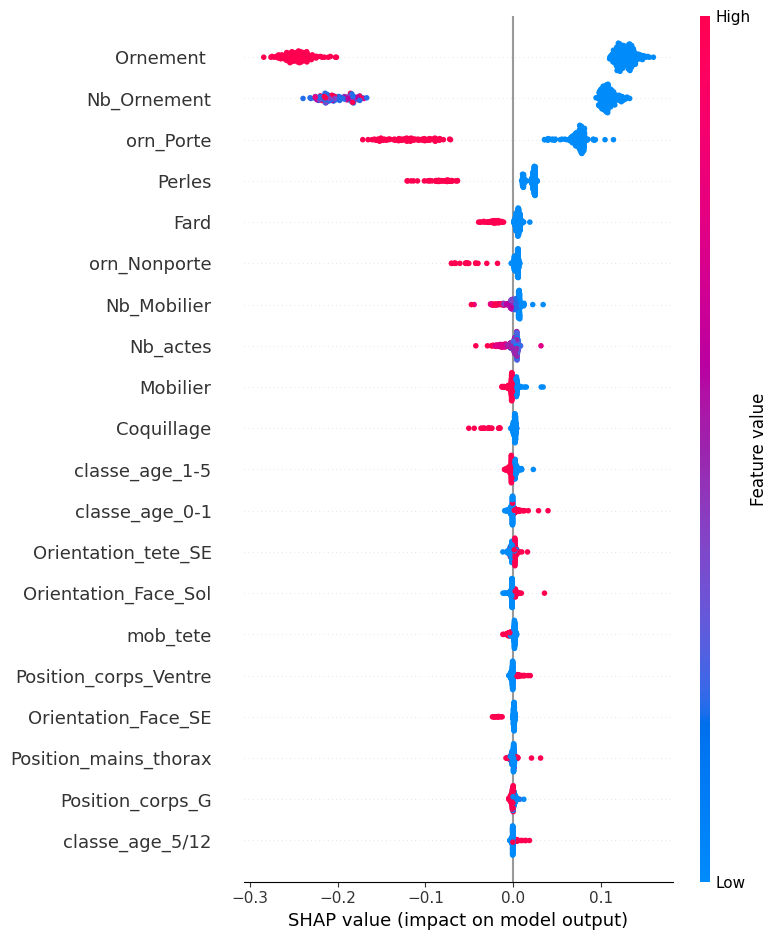

In [74]:
shap.initjs()
shap.summary_plot(shap_values[1], data_train)

In [75]:
data_cluster.to_csv('Egypt_Cluster_Data_315_V.csv')